# Arriving Passenger Analysis 

#### Datasets = Parking, AirTrain, TNC + Concourse

## Preprocessing

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import seaborn as sns

In [2]:
#import 

#Flight_Schedule = pd.read_csv('/green-projects/project-airport_dppc_ewr_b/workspace/share/data/Flight Schedule Detailed CUSP Export.csv')
Con = pd.read_csv('/green-projects/project-airport_dppc_ewr_b/workspace/share/data/New Data/Flight Schedule w Concourse-Copy1.csv')

Parking1 = pd.read_excel('/green-projects/project-airport_dppc_ewr_b/workspace/share/data/Parking Stays Sept 1 _ Sept 15 2021.xlsx')
Parking2 = pd.read_excel('/green-projects/project-airport_dppc_ewr_b/workspace/share/data/Parking Stays Sept 16 _ Sept 30 2021.xlsx')

AT = pd.read_csv('/green-projects/project-airport_dppc_ewr_b/workspace/share/data/APC.csv')

TNC = pd.read_csv('/green-projects/project-airport_dppc_ewr_b/workspace/share/data/TNC_Data_09012021_12312021.csv')

### Concourse Data

In [3]:
Con.head()

,Id,Flight Date,Flight Arrving Date Time,Flight Departing Date Time,Flight Date Time,Flight Arriving Time,Flight Departing Time,Date Hour Numeric,PA Time,Non-PA Time,...,Valid Destination Indicator,Valid Carrier Indicator,Operating Airline Code,Operating Airline Name,TerminalId,Operating Airline Id,Flight Time,nonpaxratio,TSALoadFactor,Departure Concourse
0,98394474,2021-01-02,2021-01-02T11:25:00.000Z,2021-01-02T11:15:00.000Z,2021-01-02T11:15:00.000Z,1900-01-01T11:25:00.000Z,1900-01-01T11:15:00.000Z,2021010211,1900-01-01T11:15:00.000Z,1900-01-01T11:25:00.000Z,...,1,1,AI,Air India,10,404,1900-01-01T11:15:00.000Z,NaN,NaN,Concourse B-3
1,98394693,2021-01-02,2021-01-02T19:10:00.000Z,2021-01-02T15:10:00.000Z,2021-01-02T15:10:00.000Z,1900-01-01T19:10:00.000Z,1900-01-01T15:10:00.000Z,2021010215,1900-01-01T15:10:00.000Z,1900-01-01T19:10:00.000Z,...,1,1,TA,Taca International Airlines,10,6105,1900-01-01T15:10:00.000Z,NaN,NaN,Hard Stand
2,98394899,2021-01-01,2021-01-01T08:50:00.000Z,2021-01-01T19:30:00.000Z,2021-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010119,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,...,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
3,98394900,2021-01-02,2021-01-02T08:50:00.000Z,2021-01-02T19:30:00.000Z,2021-01-02T19:30:00.000Z,1900-01-01T08:50:00.000Z,1900-01-01T19:30:00.000Z,2021010219,1900-01-01T19:30:00.000Z,1900-01-01T08:50:00.000Z,...,1,1,B0,La Compagnie,10,6110,1900-01-01T19:30:00.000Z,NaN,NaN,Concourse B-2
4,98394985,2021-01-01,2021-01-01T11:00:00.000Z,2021-01-01T21:50:00.000Z,2021-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,1900-01-01T21:50:00.000Z,2021010121,1900-01-01T21:50:00.000Z,1900-01-01T11:00:00.000Z,...,1,1,B0,La Compagnie,10,6110,1900-01-01T21:50:00.000Z,NaN,NaN,Concourse B-3


In [4]:
options = ['Concourse B-1', 'Concourse B-2','Concourse B-3']
Con_df = Con[Con['Departure Concourse'].isin(options)]

In [5]:
Con_df = Con_df[['Id','Flight Date','Flight Departing Date Time','Operating Airline Name',\
                 'Flight No','International Domestic','Flight Distance',\
                'Seats','Departure Concourse']]

In [6]:
start, stop = 0, 10

Con_df['Dept Date'] = Con_df['Flight Departing Date Time'].str.slice(start, stop)

In [7]:
start, stop = 11, 16

Con_df['Dept Time'] = Con_df['Flight Departing Date Time'].str.slice(start, stop)

In [8]:
Con_df['Dept_Date_Time'] = Con_df['Dept Date']+' '+Con_df['Dept Time'].astype(str)
Con_df['Dept_Date_Time'] = pd.to_datetime(Con_df['Dept_Date_Time'], format='%Y-%m-%d %H:%M:%S')

In [9]:
Con_df = Con_df[['Id','Dept_Date_Time','Operating Airline Name','International Domestic',\
                'Flight Distance','Seats','Departure Concourse']]

In [10]:
Con_df = Con_df.replace({'Departure Concourse':{'Concourse B-1':'B1','Concourse B-2':'B2','Concourse B-3':'B3'}})

In [11]:
Con_df = Con_df.sort_values(by='Dept_Date_Time')
Con_df.head()

,Id,Dept_Date_Time,Operating Airline Name,International Domestic,Flight Distance,Seats,Departure Concourse
52,98412134,2021-01-01 00:59:00,Spirit Airlines,Domestic,1608,228,B3
84,98415401,2021-01-01 06:00:00,Spirit Airlines,Domestic,1065,228,B1
24,98400167,2021-01-01 06:00:00,Delta Air Lines,Domestic,488,109,B1
30,98402025,2021-01-01 06:15:00,Delta Air Lines,Domestic,746,160,B1
50,98412019,2021-01-01 07:00:00,Spirit Airlines,Domestic,1068,182,B1


In [12]:
Con_df['Hour'] = Con_df['Dept_Date_Time'].dt.hour

In [13]:
morning = [6,7,8,9,10,11,12]
afternoon = [13,14,15,16,17]
evening = [18,19,20,21,22]
overnight = [23,0,1,2,3,4,5]

In [14]:
lsthour = []
for s in Con_df['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [15]:
Con_df['Time Category'] = lsthour

In [16]:
Con_df['DOW'] = Con_df['Dept_Date_Time'].dt.weekday
Con_df['DOW_l'] = Con_df['DOW'].copy()
Con_df["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [17]:
Con_df['Month'] = Con_df['Dept_Date_Time'].dt.month

In [18]:
Con_df.tail()

,Id,Dept_Date_Time,Operating Airline Name,International Domestic,Flight Distance,Seats,Departure Concourse,Hour,Time Category,DOW,DOW_l,Month
27893,533324386,2022-04-18 21:50:00,Swiss International Airlines,International,3946,236,B3,21,Evening,0,Monday,4
28215,533334857,2022-04-18 22:18:00,Spirit Airlines,Domestic,1504,182,B1,22,Evening,0,Monday,4
27552,533312193,2022-04-18 22:55:00,French Bee,International,3648,411,B2,22,Evening,0,Monday,4
28304,533341355,2022-04-18 23:00:00,Tap-Portuguese Airlines (TAP Portugal),International,3385,168,B3,23,Overnight,0,Monday,4
28024,533328125,2022-04-18 23:55:00,Emirates,International,4948,354,B2,23,Overnight,0,Monday,4


In [19]:
Con_sept = Con_df[Con_df['Month'] == 9]
Con_sept.tail()

,Id,Dept_Date_Time,Operating Airline Name,International Domestic,Flight Distance,Seats,Departure Concourse,Hour,Time Category,DOW,DOW_l,Month
13010,331908792,2021-09-30 21:40:00,Spirit Airlines,Domestic,746,182,B1,21,Evening,3,Thursday,9
13041,331990100,2021-09-30 21:55:00,Swiss International Airlines,International,3946,236,B3,21,Evening,3,Thursday,9
13004,331906128,2021-09-30 22:55:00,LOT Polish Airlines,International,4278,252,B3,22,Evening,3,Thursday,9
13021,331916534,2021-09-30 23:00:00,Tap-Portuguese Airlines (TAP Portugal),International,3385,168,B3,23,Overnight,3,Thursday,9
13034,331985621,2021-09-30 23:55:00,Emirates,International,4948,354,B2,23,Overnight,3,Thursday,9


### Parking

In [20]:
n=3
Parking1.drop(Parking1.tail(n).index,inplace=True)

In [21]:
n=3
Parking2.drop(Parking2.tail(n).index,inplace=True)

In [22]:
Parking = pd.concat([Parking1, Parking2],ignore_index = True)

In [23]:
Parking = Parking [['Entry Date','Entry Military Time']]

In [24]:
Parking["Entry Date"]= Parking["Entry Date"].astype(str)

In [25]:
start, stop = 0, 11

Parking['Date'] = Parking['Entry Date'].str.slice(start, stop)

In [26]:
Parking.dtypes

Entry Date             object
Entry Military Time    object
Date                   object
dtype: object

In [27]:
Parking.head()

,Entry Date,Entry Military Time,Date
0,2021-09-01 00:00:00,00:00:06,2021-09-01
1,2021-09-01 00:00:00,00:00:40,2021-09-01
2,2021-09-01 00:00:00,00:01:09,2021-09-01
3,2021-09-01 00:00:00,00:01:40,2021-09-01
4,2021-09-01 00:00:00,00:01:48,2021-09-01


In [28]:
Parking['Parking_Time'] = Parking['Date']+' '+Parking['Entry Military Time'].astype(str)

In [29]:
Parking['Parking_Time'] = pd.to_datetime(Parking['Parking_Time'])

In [30]:
Parking.dtypes

Entry Date                     object
Entry Military Time            object
Date                           object
Parking_Time           datetime64[ns]
dtype: object

In [31]:
Parking['MM-DD'] = Parking['Parking_Time'].dt.strftime('%m-%d')
Parking['Day'] = Parking['Parking_Time'].dt.day
Parking['Hour'] = Parking['Parking_Time'].dt.hour
Parking['DOW'] = Parking['Parking_Time'].dt.weekday
Parking['DOW_l'] = Parking['DOW'].copy()
Parking["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [32]:
Parking.head()

,Entry Date,Entry Military Time,Date,Parking_Time,MM-DD,Day,Hour,DOW,DOW_l
0,2021-09-01 00:00:00,00:00:06,2021-09-01,2021-09-01 00:00:06,09-01,1,0,2,Wednesday
1,2021-09-01 00:00:00,00:00:40,2021-09-01,2021-09-01 00:00:40,09-01,1,0,2,Wednesday
2,2021-09-01 00:00:00,00:01:09,2021-09-01,2021-09-01 00:01:09,09-01,1,0,2,Wednesday
3,2021-09-01 00:00:00,00:01:40,2021-09-01,2021-09-01 00:01:40,09-01,1,0,2,Wednesday
4,2021-09-01 00:00:00,00:01:48,2021-09-01,2021-09-01 00:01:48,09-01,1,0,2,Wednesday


In [33]:
Parking_sept = Parking[['Parking_Time','MM-DD','Day','Hour','DOW','DOW_l']]

In [34]:
Parking_sept.head()

,Parking_Time,MM-DD,Day,Hour,DOW,DOW_l
0,2021-09-01 00:00:06,09-01,1,0,2,Wednesday
1,2021-09-01 00:00:40,09-01,1,0,2,Wednesday
2,2021-09-01 00:01:09,09-01,1,0,2,Wednesday
3,2021-09-01 00:01:40,09-01,1,0,2,Wednesday
4,2021-09-01 00:01:48,09-01,1,0,2,Wednesday


In [35]:
lsthour = []
for s in Parking_sept['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [36]:
Parking_sept['Time Category'] = lsthour

### AirTrain Data

In [37]:
AT_og = AT.copy()

In [38]:
AT_og['Station'].unique()

array(['P2', 'P3', 'P4', 'Rail Link', 'Terminal A', 'Terminal B',
       'Terminal C'], dtype=object)

In [39]:
AT = AT_og[AT_og['Station'] == 'Terminal B']
AT = AT[AT['Month'] == 'September']
AT = AT[AT['Year'] == 2021]

In [40]:
AT.head()

,Platform,Date,Hour,TotalOn,TotalOff,TotalOn&Off,DayOfWeek,Week,Month,Year,Station,PlatformSide,Unnamed: 12,Unnamed: 13
81658,Terminal B Airside,2021/9/1,0,50.0,50.0,100.0,Wednesday,36,September,2021,Terminal B,Airside,NaN,NaN
81659,Terminal B Landside,2021/9/1,0,1.0,1.0,2.0,Wednesday,36,September,2021,Terminal B,Landside,NaN,NaN
81672,Terminal B Airside,2021/9/1,1,22.0,22.0,44.0,Wednesday,36,September,2021,Terminal B,Airside,NaN,NaN
81673,Terminal B Landside,2021/9/1,1,0.0,0.0,0.0,Wednesday,36,September,2021,Terminal B,Landside,NaN,NaN
81686,Terminal B Airside,2021/9/1,2,18.0,18.0,36.0,Wednesday,36,September,2021,Terminal B,Airside,NaN,NaN


In [41]:
AT_sept = AT[['Date','Hour','TotalOff','DayOfWeek']]
AT_sept.head()

,Date,Hour,TotalOff,DayOfWeek
81658,2021/9/1,0,50.0,Wednesday
81659,2021/9/1,0,1.0,Wednesday
81672,2021/9/1,1,22.0,Wednesday
81673,2021/9/1,1,0.0,Wednesday
81686,2021/9/1,2,18.0,Wednesday


In [42]:
lsthour = []
for s in AT_sept['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [43]:
AT_sept['Time Category'] = lsthour

In [44]:
AT_sept.head()

,Date,Hour,TotalOff,DayOfWeek,Time Category
81658,2021/9/1,0,50.0,Wednesday,Overnight
81659,2021/9/1,0,1.0,Wednesday,Overnight
81672,2021/9/1,1,22.0,Wednesday,Overnight
81673,2021/9/1,1,0.0,Wednesday,Overnight
81686,2021/9/1,2,18.0,Wednesday,Overnight


### TNC Data

In [45]:
TNC.head()

,Dispatch Id,Airport Code,Location,Latitude,Longitude,Car Company,Ride Date and Time
0,[B@2c4bf540,EWR,TermB,40.6906,-74.1776,Uber,2021-10-23T14:59:38.000Z
1,[B@82596c2,EWR,TermB,40.6908,-74.1774,Uber,2021-10-18T17:49:03.000Z
2,[B@54d2b33b,EWR,TermB,40.6903,-74.1778,Uber,2021-10-26T06:36:01.000Z
3,[B@59797143,EWR,TermB,40.6903,-74.1778,Uber,2021-10-30T07:54:49.000Z
4,[B@2a6b7ed9,EWR,TermB,40.6903,-74.1779,Uber,2021-11-17T06:52:43.000Z


In [46]:
start, stop = 0, 10

TNC['Date'] = TNC["Ride Date and Time"].str.slice(start, stop)

In [47]:
start, stop = 11, 16

TNC['Time'] = TNC["Ride Date and Time"].str.slice(start, stop)

In [48]:
TNC['TNC_Arrival_Time'] = TNC['Date']+' '+TNC['Time'].astype(str)
TNC['TNC_Arrival_Time'] = pd.to_datetime(TNC['TNC_Arrival_Time'], format='%Y-%m-%d %H:%M:%S')
TNC.head()

,Dispatch Id,Airport Code,Location,Latitude,Longitude,Car Company,Ride Date and Time,Date,Time,TNC_Arrival_Time
0,[B@2c4bf540,EWR,TermB,40.6906,-74.1776,Uber,2021-10-23T14:59:38.000Z,2021-10-23,14:59,2021-10-23 14:59:00
1,[B@82596c2,EWR,TermB,40.6908,-74.1774,Uber,2021-10-18T17:49:03.000Z,2021-10-18,17:49,2021-10-18 17:49:00
2,[B@54d2b33b,EWR,TermB,40.6903,-74.1778,Uber,2021-10-26T06:36:01.000Z,2021-10-26,06:36,2021-10-26 06:36:00
3,[B@59797143,EWR,TermB,40.6903,-74.1778,Uber,2021-10-30T07:54:49.000Z,2021-10-30,07:54,2021-10-30 07:54:00
4,[B@2a6b7ed9,EWR,TermB,40.6903,-74.1779,Uber,2021-11-17T06:52:43.000Z,2021-11-17,06:52,2021-11-17 06:52:00


In [49]:
TNC['Month'] = TNC['TNC_Arrival_Time'].dt.month

In [50]:
TNC = TNC[TNC['Month']==9] 

In [51]:
TNC = TNC.sort_values(by='TNC_Arrival_Time')

In [52]:
TNC.tail()

,Dispatch Id,Airport Code,Location,Latitude,Longitude,Car Company,Ride Date and Time,Date,Time,TNC_Arrival_Time,Month
414229,[B@34cbe323,EWR,TermB,40.6906,-74.1777,Uber,2021-09-30T22:41:02.000Z,2021-09-30,22:41,2021-09-30 22:41:00,9
481751,[B@e2950fb,EWR,TermB,40.6906,-74.1777,Uber,2021-09-30T22:41:02.000Z,2021-09-30,22:41,2021-09-30 22:41:00,9
463171,[B@b256d82,EWR,TermB,40.6906,-74.1777,Lyft,2021-09-30T22:50:16.000Z,2021-09-30,22:50,2021-09-30 22:50:00,9
11015,[B@412b1531,EWR,TermB,40.6906,-74.1777,Lyft,2021-09-30T22:50:16.000Z,2021-09-30,22:50,2021-09-30 22:50:00,9
468162,[B@487eee26,EWR,TermB,40.6906,-74.1777,Lyft,2021-09-30T22:50:16.000Z,2021-09-30,22:50,2021-09-30 22:50:00,9


In [53]:
TNC_sept = TNC[['Dispatch Id','TNC_Arrival_Time','Date','Month','Time']]

In [54]:
TNC_sept['Hour'] = TNC_sept['TNC_Arrival_Time'].dt.hour

In [55]:
lsthour = []
for s in TNC_sept['Hour']:
        if s in morning:
            lsthour.append('Morning')
        elif s in afternoon:
            lsthour.append('Afternoon')
        elif s in evening:
            lsthour.append('Evening')
        elif s in overnight:
            lsthour.append('Overnight')

In [56]:
TNC_sept['Time Category'] = lsthour

In [57]:
TNC_sept['DOW'] = TNC_sept['TNC_Arrival_Time'].dt.weekday
TNC_sept['DOW_l'] = TNC_sept['DOW'].copy()
TNC_sept["DOW_l"].replace({0: "Monday", 1: "Tuesday",2:"Wednesday",3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)

In [58]:
TNC_sept.head()

,Dispatch Id,TNC_Arrival_Time,Date,Month,Time,Hour,Time Category,DOW,DOW_l
279259,[B@2128e7c2,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
123148,[B@4ab7654e,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
287856,[B@2adb3f00,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
143302,[B@f63c0ff,2021-09-01 05:02:00,2021-09-01,9,05:02,5,Overnight,2,Wednesday
48232,[B@700602a0,2021-09-01 05:02:00,2021-09-01,9,05:02,5,Overnight,2,Wednesday


In [59]:
#Dataframes

#Concourse = Con_sept 
#Parking = Parking_sept
#Airtrain = AT_sept 
#TNC = TNC_sept 

## 1. Peaks of TNC/AirTrain/Parking vs Flight Schedule 

### Extra Processing

#### Concourse

In [60]:
Con_sept.head()

,Id,Dept_Date_Time,Operating Airline Name,International Domestic,Flight Distance,Seats,Departure Concourse,Hour,Time Category,DOW,DOW_l,Month
11255,302459807,2021-09-01 00:34:00,Frontier Airlines,Domestic,1608,186,B3,0,Overnight,2,Wednesday,9
11273,302464702,2021-09-01 05:00:00,Spirit Airlines,Domestic,1065,228,B3,5,Overnight,2,Wednesday,9
11280,302465672,2021-09-01 05:15:00,Spirit Airlines,Domestic,937,228,B3,5,Overnight,2,Wednesday,9
11241,302454821,2021-09-01 06:00:00,Delta Air Lines,Domestic,746,180,B1,6,Morning,2,Wednesday,9
11238,302453086,2021-09-01 06:10:00,Delta Air Lines,Domestic,488,180,B1,6,Morning,2,Wednesday,9


In [61]:
#total
Con_hour = Con_sept.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_hour.sort_values(by='Hour')
Con_hour.rename(columns={'Id':'N_flights'}, inplace=True)

In [62]:
Con_hour.head()

,Hour,Seats,N_flights,Flight Distance
0,0,1302,7,1608.000000
1,5,4788,21,1034.523810
2,6,22576,130,976.046154
3,7,12073,72,1438.819444
4,8,11665,66,1205.924242


In [63]:
#monday
Con_mon = Con_sept[Con_sept['DOW_l'] == 'Monday']

In [64]:
Con_mon = Con_mon.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_mon.sort_values(by='Hour')
Con_mon.rename(columns={'Id':'N_flights'}, inplace=True)

In [65]:
#Tuesday
Con_tue = Con_sept[Con_sept['DOW_l'] == 'Tuesday']
Con_tue = Con_tue.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_tue.sort_values(by='Hour')
Con_tue.rename(columns={'Id':'N_flights'}, inplace=True)

In [66]:
#Wednesday
Con_wed = Con_sept[Con_sept['DOW_l'] == 'Wednesday']
Con_wed = Con_wed.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_wed.sort_values(by='Hour')
Con_wed.rename(columns={'Id':'N_flights'}, inplace=True)

In [67]:
#Thursday
Con_thr = Con_sept[Con_sept['DOW_l'] == 'Thursday']
Con_thr = Con_thr.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_thr.sort_values(by='Hour')
Con_thr.rename(columns={'Id':'N_flights'}, inplace=True)

In [68]:
#Friday
Con_fri = Con_sept[Con_sept['DOW_l'] == 'Friday']
Con_fri = Con_fri.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_fri.sort_values(by='Hour')
Con_fri.rename(columns={'Id':'N_flights'}, inplace=True)

In [69]:
#Saturday
Con_sat = Con_sept[Con_sept['DOW_l'] == 'Saturday']
Con_sat = Con_sat.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_sat.sort_values(by='Hour')
Con_sat.rename(columns={'Id':'N_flights'}, inplace=True)

In [70]:
#Sunday
Con_sun = Con_sept[Con_sept['DOW_l'] == 'Sunday']
Con_sun = Con_sun.groupby('Hour',as_index = False).agg({'Flight Distance':'mean','Seats':'sum','Id':'count'})
Con_sun.sort_values(by='Hour')
Con_sun.rename(columns={'Id':'N_flights'}, inplace=True)

#### Parking

In [71]:
Parking_sept.head()

,Parking_Time,MM-DD,Day,Hour,DOW,DOW_l,Time Category
0,2021-09-01 00:00:06,09-01,1,0,2,Wednesday,Overnight
1,2021-09-01 00:00:40,09-01,1,0,2,Wednesday,Overnight
2,2021-09-01 00:01:09,09-01,1,0,2,Wednesday,Overnight
3,2021-09-01 00:01:40,09-01,1,0,2,Wednesday,Overnight
4,2021-09-01 00:01:48,09-01,1,0,2,Wednesday,Overnight


In [72]:
#Total
Parking_hour = Parking_sept.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_hour.sort_values(by='Hour')
Parking_hour.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [73]:
#Monday
Parking_mon = Parking_sept[Parking_sept['DOW_l'] == 'Monday']
Parking_mon = Parking_mon.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_mon.sort_values(by='Hour')
Parking_mon.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [74]:
#Tuesday
Parking_tue = Parking_sept[Parking_sept['DOW_l'] == 'Tuesday']
Parking_tue = Parking_tue.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_tue.sort_values(by='Hour')
Parking_tue.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [75]:
#Wednesday
Parking_wed = Parking_sept[Parking_sept['DOW_l'] == 'Wednesday']
Parking_wed = Parking_wed.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_wed.sort_values(by='Hour')
Parking_wed.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [76]:
#Thursday
Parking_thr = Parking_sept[Parking_sept['DOW_l'] == 'Thursday']
Parking_thr = Parking_thr.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_thr.sort_values(by='Hour')
Parking_thr.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [77]:
#Friday
Parking_fri = Parking_sept[Parking_sept['DOW_l'] == 'Friday']
Parking_fri = Parking_fri.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_fri.sort_values(by='Hour')
Parking_fri.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [78]:
#Saturday
Parking_sat = Parking_sept[Parking_sept['DOW_l'] == 'Saturday']
Parking_sat = Parking_sat.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_sat.sort_values(by='Hour')
Parking_sat.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [79]:
#Sunday
Parking_sun = Parking_sept[Parking_sept['DOW_l'] == 'Sunday']
Parking_sun = Parking_sun.groupby('Hour',as_index = False).agg({'Parking_Time':'count'})
Parking_sun.sort_values(by='Hour')
Parking_sun.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

#### AirTrain

In [80]:
AT_sept.head()

,Date,Hour,TotalOff,DayOfWeek,Time Category
81658,2021/9/1,0,50.0,Wednesday,Overnight
81659,2021/9/1,0,1.0,Wednesday,Overnight
81672,2021/9/1,1,22.0,Wednesday,Overnight
81673,2021/9/1,1,0.0,Wednesday,Overnight
81686,2021/9/1,2,18.0,Wednesday,Overnight


In [81]:
AT_sept.reset_index(inplace=True)

In [82]:
AT_sept.head()

,index,Date,Hour,TotalOff,DayOfWeek,Time Category
0,81658,2021/9/1,0,50.0,Wednesday,Overnight
1,81659,2021/9/1,0,1.0,Wednesday,Overnight
2,81672,2021/9/1,1,22.0,Wednesday,Overnight
3,81673,2021/9/1,1,0.0,Wednesday,Overnight
4,81686,2021/9/1,2,18.0,Wednesday,Overnight


In [83]:
#Total
AT_hour = AT_sept.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_hour.sort_values(by='Hour')
AT_hour.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [84]:
#Monday
AT_mon = AT_sept[AT_sept['DayOfWeek'] == 'Monday']
AT_mon = AT_mon.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_mon.sort_values(by='Hour')
AT_mon.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [85]:
#Tuesday
AT_tue = AT_sept[AT_sept['DayOfWeek'] == 'Tuesday']
AT_tue = AT_tue.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_tue.sort_values(by='Hour')
AT_tue.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [86]:
#Wednesday
AT_wed = AT_sept[AT_sept['DayOfWeek'] == 'Wednesday']
AT_wed = AT_wed.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_wed.sort_values(by='Hour')
AT_wed.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [87]:
#Thurday
AT_thr = AT_sept[AT_sept['DayOfWeek'] == 'Thursday']
AT_thr = AT_thr.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_thr.sort_values(by='Hour')
AT_thr.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [88]:
#Friday
AT_fri = AT_sept[AT_sept['DayOfWeek'] == 'Friday']
AT_fri = AT_fri.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_fri.sort_values(by='Hour')
AT_fri.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [89]:
#Saturday
AT_sat = AT_sept[AT_sept['DayOfWeek'] == 'Saturday']
AT_sat = AT_sat.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_sat.sort_values(by='Hour')
AT_sat.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [90]:
#Sunday
AT_sun = AT_sept[AT_sept['DayOfWeek'] == 'Sunday']
AT_sun = AT_sun.groupby('Hour',as_index = False).agg({'TotalOff':'sum'})
AT_sun.sort_values(by='Hour')
AT_sun.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

#### TNC

In [91]:
TNC_sept.head()

,Dispatch Id,TNC_Arrival_Time,Date,Month,Time,Hour,Time Category,DOW,DOW_l
279259,[B@2128e7c2,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
123148,[B@4ab7654e,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
287856,[B@2adb3f00,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
143302,[B@f63c0ff,2021-09-01 05:02:00,2021-09-01,9,05:02,5,Overnight,2,Wednesday
48232,[B@700602a0,2021-09-01 05:02:00,2021-09-01,9,05:02,5,Overnight,2,Wednesday


In [92]:
#Total
TNC_hour = TNC_sept.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_hour.sort_values(by='Hour')
TNC_hour.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [93]:
#Monday
TNC_mon = TNC_sept[TNC_sept['DOW_l'] == 'Monday']
TNC_mon = TNC_mon.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_mon.sort_values(by='Hour')
TNC_mon.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [94]:
#Tuesday
TNC_tue = TNC_sept[TNC_sept['DOW_l'] == 'Tuesday']
TNC_tue = TNC_tue.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_tue.sort_values(by='Hour')
TNC_tue.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [95]:
#Wednesday
TNC_wed = TNC_sept[TNC_sept['DOW_l'] == 'Wednesday']
TNC_wed = TNC_wed.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_wed.sort_values(by='Hour')
TNC_wed.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [96]:
#Thursday
TNC_thr = TNC_sept[TNC_sept['DOW_l'] == 'Thursday']
TNC_thr = TNC_thr.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_thr.sort_values(by='Hour')
TNC_thr.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [97]:
#Friday
TNC_fri = TNC_sept[TNC_sept['DOW_l'] == 'Friday']
TNC_fri = TNC_fri.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_fri.sort_values(by='Hour')
TNC_fri.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [98]:
#Saturday
TNC_sat = TNC_sept[TNC_sept['DOW_l'] == 'Saturday']
TNC_sat = TNC_sat.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_sat.sort_values(by='Hour')
TNC_sat.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [99]:
#Sunday
TNC_sun = TNC_sept[TNC_sept['DOW_l'] == 'Sunday']
TNC_sun = TNC_sun.groupby('Hour',as_index = False).agg({'Dispatch Id':'count'})
TNC_sun.sort_values(by='Hour')
TNC_sun.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

### Merging by Day of the Week

In [100]:
from functools import reduce

In [101]:
#monday
data_frames_mon = [Con_mon, Parking_mon, AT_mon,TNC_mon]
mon_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_mon).fillna('0')

In [102]:
#tuesday
data_frames_tue = [Con_tue, Parking_tue, AT_tue,TNC_tue]
tue_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_tue).fillna('0')

In [103]:
#wednesday 
data_frames_wed = [Con_wed, Parking_wed, AT_wed,TNC_wed]
wed_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_wed).fillna('0')

In [104]:
#thursday 
data_frames_thr = [Con_thr, Parking_thr, AT_thr,TNC_thr]
thr_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_thr).fillna('0')

In [105]:
#friday 
data_frames_fri = [Con_fri, Parking_fri, AT_fri,TNC_fri]
fri_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_fri).fillna('0')

In [106]:
#saturday 
data_frames_sat = [Con_sat, Parking_sat, AT_sat,TNC_sat]
sat_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_sat).fillna('0')

In [107]:
#sunday 
data_frames_sun = [Con_sun, Parking_sun, AT_sun,TNC_sun]
sun_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_sun).fillna('0')

In [108]:
#total 
data_frames_tot = [Con_hour,Parking_hour,AT_hour,TNC_hour]
tot_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Hour'],how='inner'), data_frames_tot).fillna('0')

In [109]:
mon_merged.head()

,Hour,Seats,N_flights,Flight Distance,N_cars,N_passengers,N_fhv
0,0,186,1,1608.000000,192,268.0,24
1,5,456,2,1001.000000,1346,1124.0,1650
2,6,3358,19,966.789474,1880,1230.0,1572
3,7,1056,7,1475.142857,1631,727.0,1473
4,8,1951,11,1111.090909,1489,699.0,1654


### Visualization

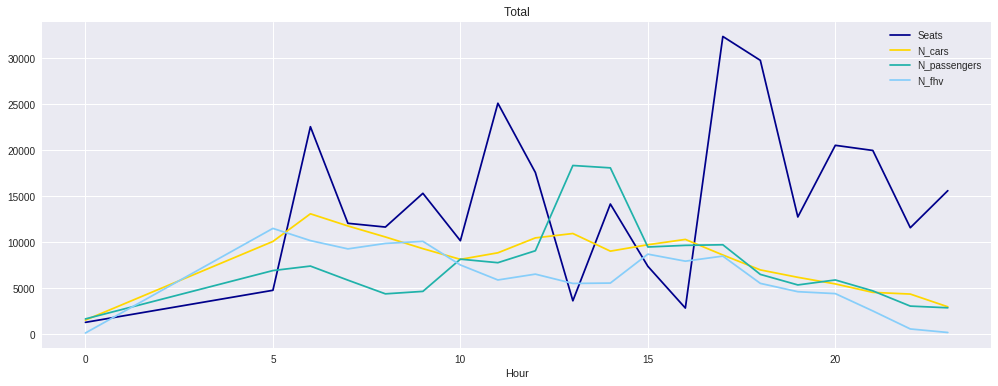

In [110]:
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']

tot_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)

plt.title("Total")
plt.show()

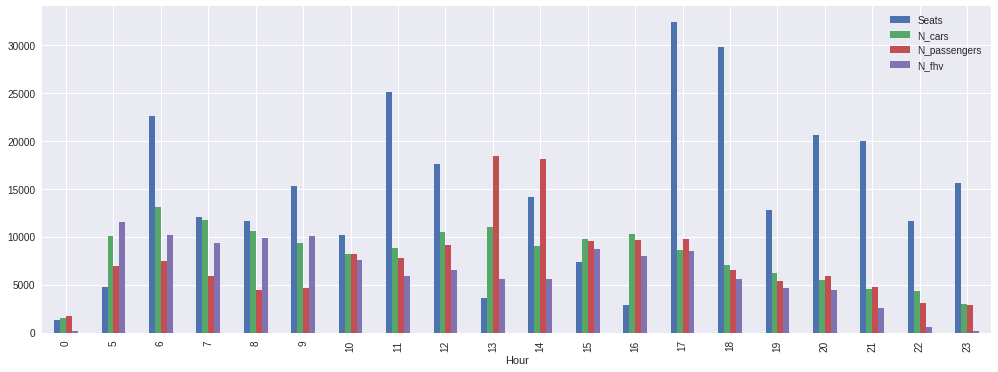

In [111]:
tot_merged.plot(x="Hour", y=["Seats","N_cars","N_passengers",'N_fhv'],kind="bar", figsize=(17, 6))

plt.show()

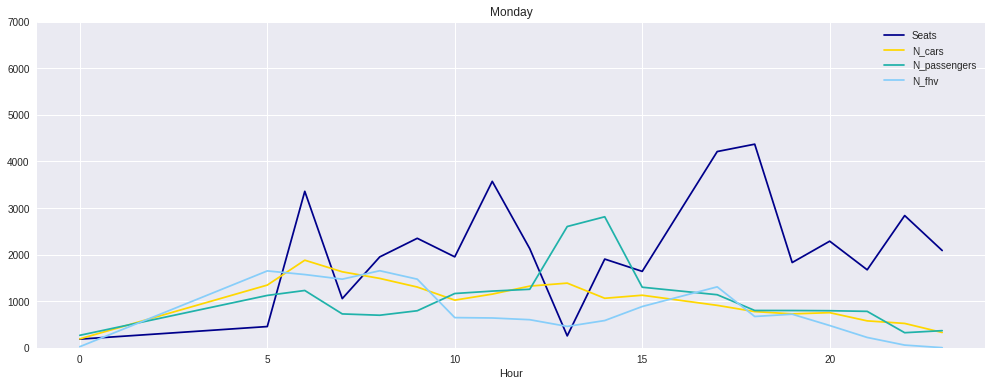

In [112]:
mon_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)

plt.title("Monday")
plt.show()

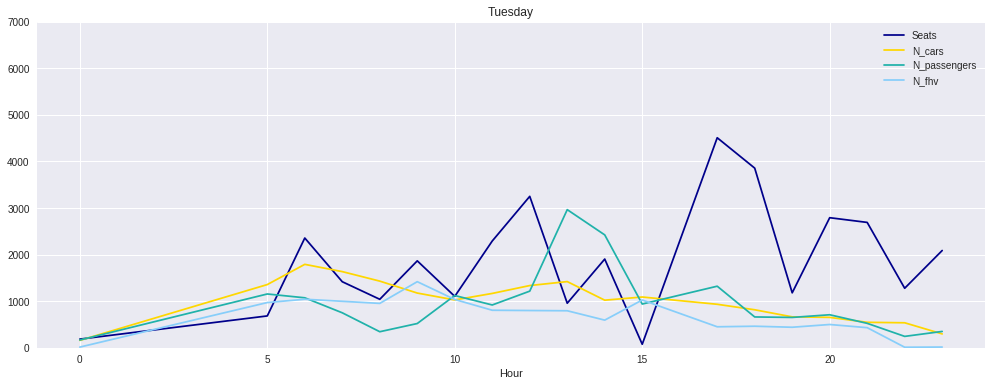

In [113]:
tue_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)
plt.title("Tuesday")
plt.show()

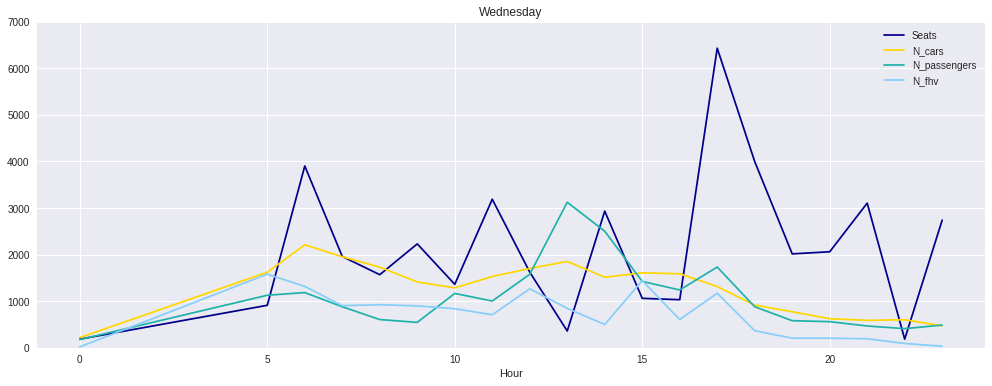

In [114]:
wed_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)
plt.title("Wednesday")
plt.show()

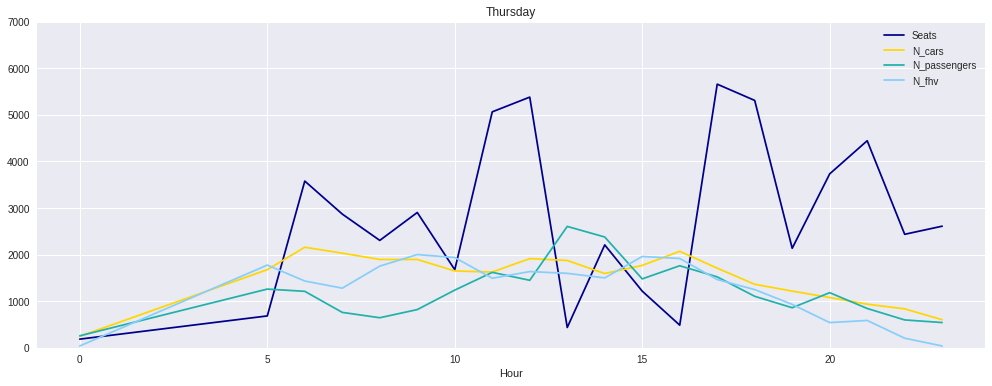

In [115]:
thr_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)
plt.title("Thursday")
plt.show()

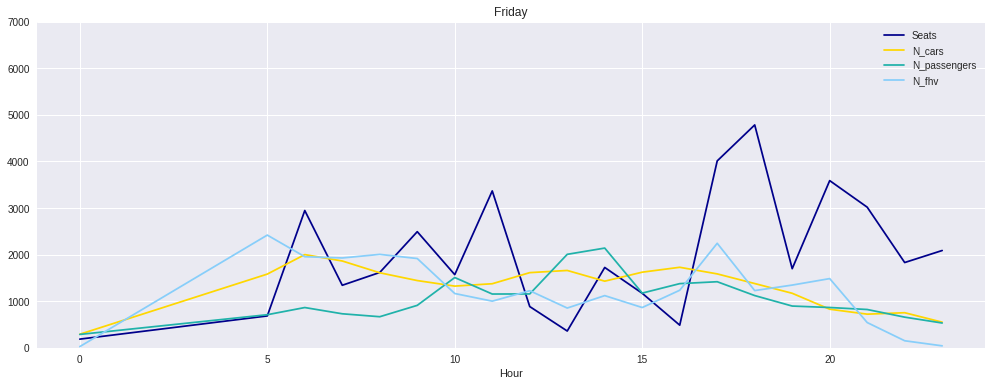

In [116]:
fri_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)
plt.title("Friday")
plt.show()

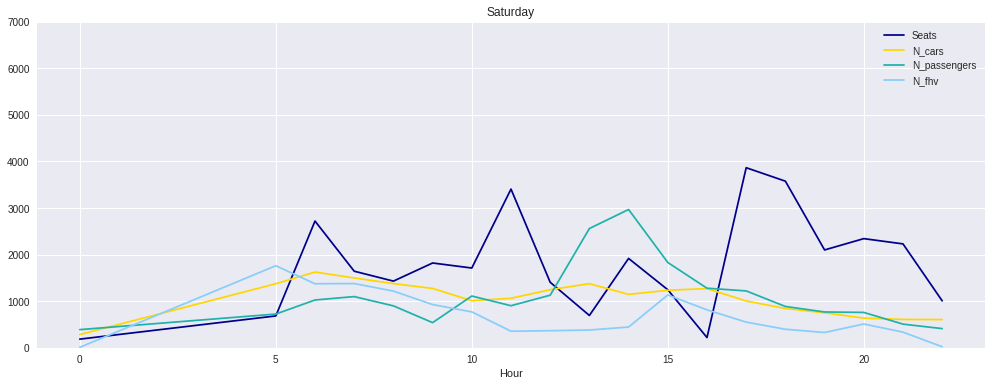

In [117]:
sat_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)
plt.title("Saturday")
plt.show()

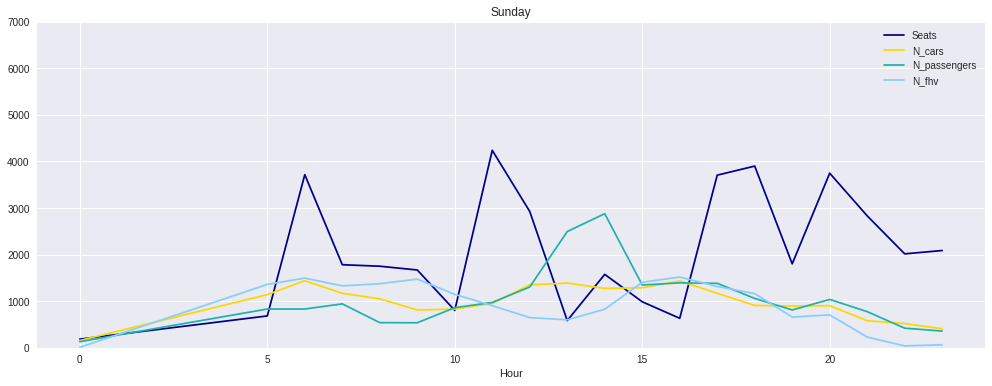

In [118]:
sun_merged.plot(x="Hour", y=["Seats", "N_cars","N_passengers",'N_fhv'],kind="line", figsize=(17, 6),color=colors)
colors=['darkblue', 'gold', 'lightseagreen','lightskyblue']
plt.ylim(0, 7000)
plt.title("Sunday")
plt.show()

## By Concourse

In [119]:
Con_sept.head()

,Id,Dept_Date_Time,Operating Airline Name,International Domestic,Flight Distance,Seats,Departure Concourse,Hour,Time Category,DOW,DOW_l,Month
11255,302459807,2021-09-01 00:34:00,Frontier Airlines,Domestic,1608,186,B3,0,Overnight,2,Wednesday,9
11273,302464702,2021-09-01 05:00:00,Spirit Airlines,Domestic,1065,228,B3,5,Overnight,2,Wednesday,9
11280,302465672,2021-09-01 05:15:00,Spirit Airlines,Domestic,937,228,B3,5,Overnight,2,Wednesday,9
11241,302454821,2021-09-01 06:00:00,Delta Air Lines,Domestic,746,180,B1,6,Morning,2,Wednesday,9
11238,302453086,2021-09-01 06:10:00,Delta Air Lines,Domestic,488,180,B1,6,Morning,2,Wednesday,9


In [120]:
Parking_sept.head()

,Parking_Time,MM-DD,Day,Hour,DOW,DOW_l,Time Category
0,2021-09-01 00:00:06,09-01,1,0,2,Wednesday,Overnight
1,2021-09-01 00:00:40,09-01,1,0,2,Wednesday,Overnight
2,2021-09-01 00:01:09,09-01,1,0,2,Wednesday,Overnight
3,2021-09-01 00:01:40,09-01,1,0,2,Wednesday,Overnight
4,2021-09-01 00:01:48,09-01,1,0,2,Wednesday,Overnight


In [121]:
TNC_sept.head()

,Dispatch Id,TNC_Arrival_Time,Date,Month,Time,Hour,Time Category,DOW,DOW_l
279259,[B@2128e7c2,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
123148,[B@4ab7654e,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
287856,[B@2adb3f00,2021-09-01 05:01:00,2021-09-01,9,05:01,5,Overnight,2,Wednesday
143302,[B@f63c0ff,2021-09-01 05:02:00,2021-09-01,9,05:02,5,Overnight,2,Wednesday
48232,[B@700602a0,2021-09-01 05:02:00,2021-09-01,9,05:02,5,Overnight,2,Wednesday


In [122]:
AT_sept.head()

,index,Date,Hour,TotalOff,DayOfWeek,Time Category
0,81658,2021/9/1,0,50.0,Wednesday,Overnight
1,81659,2021/9/1,0,1.0,Wednesday,Overnight
2,81672,2021/9/1,1,22.0,Wednesday,Overnight
3,81673,2021/9/1,1,0.0,Wednesday,Overnight
4,81686,2021/9/1,2,18.0,Wednesday,Overnight


In [123]:
Con_cat = Con_sept.groupby('Time Category',as_index = False).agg({'Id':'sum'})
Con_cat.rename(columns={'Id':'N_seats'}, inplace=True)

In [124]:
Con_cat.head()

,Time Category,N_seats
0,Afternoon,110872210821
1,Evening,140346195052
2,Morning,214132944889
3,Overnight,27426074738


In [125]:
Parking_cat = Parking_sept.groupby('Time Category',as_index = False).agg({'Parking_Time':'count'})
Parking_cat.rename(columns={'Parking_Time':'N_cars'}, inplace=True)

In [126]:
Parking_cat.head()

,Time Category,N_cars
0,Afternoon,48696
1,Evening,27623
2,Morning,72295
3,Overnight,29521


In [127]:
TNC_cat = TNC_sept.groupby('Time Category',as_index = False).agg({'Dispatch Id':'count'})
TNC_cat.rename(columns={'Dispatch Id':'N_fhv'}, inplace=True)

In [128]:
TNC_cat.head()

,Time Category,N_fhv
0,Afternoon,36286
1,Evening,17728
2,Morning,59472
3,Overnight,19213


In [129]:
AT_cat = AT_sept.groupby('Time Category',as_index = False).agg({'TotalOff':'sum'})
AT_cat.rename(columns={'TotalOff':'N_passengers'}, inplace=True)

In [130]:
AT_cat.head()

,Time Category,N_passengers
0,Afternoon,65368.0
1,Evening,25593.0
2,Morning,47435.0
3,Overnight,15945.0


In [131]:
data_frames_cat = [Con_cat,Parking_cat,AT_cat,TNC_cat]
cat_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Time Category'],how='inner'), data_frames_cat).fillna('0')

In [132]:
cat_merged.head()

,Time Category,N_seats,N_cars,N_passengers,N_fhv
0,Afternoon,110872210821,48696,65368.0,36286
1,Evening,140346195052,27623,25593.0,17728
2,Morning,214132944889,72295,47435.0,59472
3,Overnight,27426074738,29521,15945.0,19213


In [156]:
cats = ['Morning', 'Afternoon', 'Evening', 'Overnight']
mapping = {cat: i for i, cat in enumerate(cats)}
key = cat_merged['Time Category'].map(mapping)

In [160]:
cat_merged = cat_merged.iloc[key.argsort()]

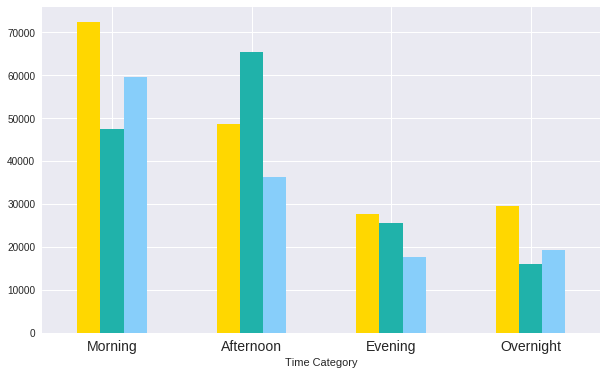

In [174]:



colors=['gold', 'lightseagreen','lightskyblue']

cat_merged.plot(x="Time Category", y=["N_cars","N_passengers",'N_fhv'],kind="bar", figsize=(10, 6),color=colors)
plt.xticks(rotation = 0,size=14)
plt.gca().get_legend().remove()

plt.show()